In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
#Predicting Image2 from Image1

First Frame
(144, 176)


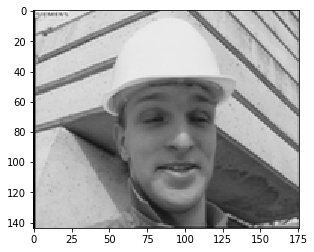

In [2]:
print(color.PURPLE + color.BOLD + 'First Frame'+ color.END + color.END)
img1 = mpimg.imread('first_frame.png')
print(np.shape(img1))
imgplot_1 = plt.imshow(img1,cmap=plt.cm.gray)

Second Frame


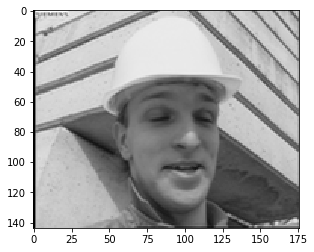

In [3]:
print(color.PURPLE + color.BOLD + 'Second Frame'+ color.END + color.END)
img2 = mpimg.imread('second_frame.png')
imgplot_2 = plt.imshow(img2,cmap=plt.cm.gray)

In [4]:
rows,cols = np.shape(img1)
for i in range(rows):
    for j in range(cols):
        img1[i][j] = img1[i][j]*255

In [5]:
rows,cols = np.shape(img2)
for i in range(rows):
    for j in range(cols):
        img2[i][j] = img2[i][j]*255

In [6]:
def valid(i,j):
    if(i < 0 or i > 128):
        return 0
    if(j < 0 or j > 160):
        return 0
    return 1

In [7]:
def window1(i,j):
    temp = np.zeros((16,16))
    if(valid(i,j)):
        temp = img2[i:i+16,j:j+16]
        return temp
    else:
        return temp

In [8]:
def window2(i,j):
    temp = np.zeros((16,16))
    if(valid(i,j)):
        temp = img1[i:i+16,j:j+16]
        return temp
    else:
        return temp

In [26]:
#Question 1
def select(i,j):
    arr1 = [[0,0],[-4,0],[4,0],[-4,4],[-4,-4],[4,4],[4,-4],[0,4],[0,-4]]
    arr2 = [[0,0],[-2,0],[2,0],[-2,2],[-2,-2],[2,2],[2,-2],[0,2],[0,-2]]
    arr3 = [[0,0],[-1,0],[1,0],[-1,1],[-1,-1],[1,1],[1,-1],[0,1],[0,-1]]
    cur_arr = window1(i,j)
    min_index  = None
    min_sum =  None
    for f in arr1:
        if(valid(i+f[0],j+f[1])):
            temp = window2(i+f[0],j+f[1])
            temp = np.subtract(cur_arr,temp)
            temp = abs(temp)
            s = sum(sum(temp))
        if(min_sum == None or min_sum > s):
            min_sum = s
            min_index = [i+f[0],j+f[1]]
    temp1 = min_index[0]
    temp2 = min_index[1]
    #print('Stage-1')
    #print(temp1)
    #print(temp2)
    min_index  = None
    min_sum =  None
    for se in arr2:
        if(valid(temp1+se[0],temp2+se[1])):
            temp = window2(temp1+se[0],temp2+se[1])
            temp = np.subtract(cur_arr,temp)
            temp = abs(temp)
            s = sum(sum(temp))
        if(min_sum == None or min_sum > s):
            min_sum = s
            min_index = [temp1+se[0],temp2+se[1]]
    temp1 = min_index[0]
    temp2 = min_index[1]
    #print('Stage-2')
    #print(temp1)
    #print(temp2)
    min_index  = None
    min_sum =  None
    for t in arr3:
        if(valid(temp1+t[0],temp2+t[1])):
            temp = window2(temp1+t[0],temp2+t[1])
            temp = np.subtract(cur_arr,temp)
            temp = abs(temp)
            s = sum(sum(temp))
        if(min_sum == None or min_sum > s):
            min_sum = s
            min_index = [temp1+t[0],temp2+t[1]]
    #print('Stage-3')
    #print(min_index[0])
    #print(min_index[1])
    return min_index[0],min_index[1]       

In [27]:
motion_vectors = [[0 for i in range(11)] for j in range(9)]
indices = [[0 for i in range(11)] for j in range(9)]
rows,cols = np.shape(img2)
for i in range(0,rows,16):
    for j in range(0,cols,16):
        #print(i/16)
        #print(j/16)
        motion_vectors[int(i/16)][int(j/16)] = select(i,j)
        indices[int(i/16)][int(j/16)] = i,j

In [28]:
#print(np.subtract(motion_vectors,indices))

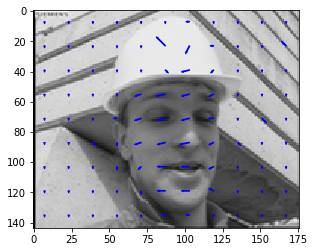

In [29]:
#Question 2
imgplot_2 = plt.imshow(img2,cmap=plt.cm.gray)
rows,cols = np.shape(img2)
for i in range(0,rows,16):
    for j in range(0,cols,16):
        temp3,temp4 = np.subtract(motion_vectors,indices)[int(i/16)][int(j/16)]
        plt.arrow(j+7, i+7,temp4,temp3 ,head_width = 1,width = 0.5,ec='blue')
plt.show()

In [14]:
#Question 3
pred_img = np.zeros((144,176))
rows,cols = np.shape(img1)
for i in range(0,rows,16):
    for j in range(0,cols,16):
        temp5,temp6 = motion_vectors[int(i/16)][int(j/16)]
        pred_img[i:i+16,j:j+16] = img1[temp5:temp5+16,temp6:temp6+16]

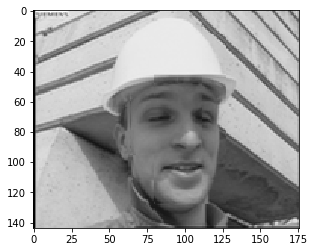

In [15]:
imgplot_3 = plt.imshow(pred_img,cmap=plt.cm.gray)

2.956912878787879


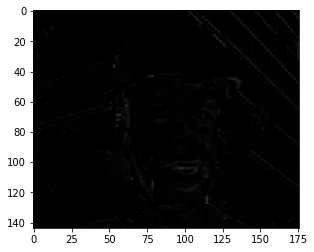

In [25]:
#Question 4
diff_img = np.subtract(pred_img,img2)
#Error per pixel
print(sum(sum(abs(diff_img)))/(rows*cols))
imgplot_3 = plt.imshow(diff_img,cmap=plt.cm.gray,vmin = 0,vmax = 255)